#Machine Learning and FinTech 2024/25
##Homework 1111 reference answer
By TA, Chan Nok Hang

| Name    | HWCODE    | Assignment |
|---------|-----------|------------|
| Sabrina | HW1111Q1  | Ch06_Q3    |
| Rebecca | HW1111Q2  | Ch06_Q4    |
| Pinyo   | HW1111Q3  | Ch06_Q8    |
| Hampus  | HW1111Q4  | Ch06_Q9    |

# Ch6_Q3
3. Suppose we estimate the regression coefficients in a linear regression model by minimizing
$$\sum_{i=1}^n(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij})^2 \text{subject to} \sum_{j=1}^p |\beta_j|\le S$$
for a particular value of s. For parts (a) through (e), indicate which
 of i. through v. is correct. Justify your answer.

##(a)
As we increase s from 0, the training RSS will:\
 i. Increase initially, and then eventually start decreasing in an
 inverted U shape.\
 ii. Decrease initially, and then eventually start increasing in a
 U shape.\
 iii. Steadily increase.\
 iv. Steadily decrease.\
 v. Remain constant.

Answer: iv. Steadily decrease. When s=0, all coefficients $β_j$ are forced to be zero, so the model predicts only the intercept $β_0$ (model can’t fit the data well without features), yielding high training RSS.

As s increases, more flexibility is allowed in the coefficients, reducing
the training RSS because the model can fit the data better.

##(b)
Repeat (a) for test RSS.

Answer: ii. Decrease initially, and then eventually start increasing in a U
shape.
Explanation:
With very low s, the model is too constrained, resulting in underfitting
and high test RSS. As s increases, the model can fit the data better, reducing
test RSS. However, after a certain point, further increasing s leads to
overfitting, causing test RSS to rise again.

##(c)
Repeat (a) for variance.

Answer: iv. Steadily increase.
Explanation:
With a small s, the coefficients (βj) are heavily constrained, leading to
low variance. As s increases, the model has more flexibility, causing higher
variance in the estimated coefficients (may lead to overfitting).

##(d)
Repeat (a) for (squared) bias.

Answer: ii. Decrease initially, and then eventually start increasing in a U shape. Explanation:
At very low s, the model is overly simplistic (highly biased). Increasing s reduces bias as the model becomes more flexible. However, too large s may cause the model to capture noise, which could indirectly affect the model's ability to generalize, potentially increasing bias slightly due to overfitting.

##(e)
Repeat (a) for the irreducible error.

Answer: v. Remain constant. Explanation:
The irreducible error is due to inherent noise in the data and cannot be affected by the model or the choice of s. Therefore, it remains constant regardless of s.

#Ch6_Q4
4. Suppose we estimate the regression coefficients in a linear regression model by minimizing
$$\sum_{i=1}^n(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2$$
for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

##(a)
As we increase $\lambda$ from 0, the training RSS will:\
 i. Increase initially, and then eventually start decreasing in an
 inverted U shape.\
 ii. Decrease initially, and then eventually start increasing in a
 U shape.\
 iii. Steadily increase.\
 iv. Steadily decrease.\
 v. Remain constant.

Answer: iii. Steadily increase.

Higher $\lambda$ leads to simpler models that may underfit, increasing training error. As $\lambda$ increases, regularization shrinks $\beta_j$, reducing the model's flexibility.


##(b)
Repeat (a) for test RSS.

Answer: ii. Decrease initially, and then eventually start increasing in a U shape.

Test RSS typically decreases initially (reduced overfitting) but increases later (underfitting) as $\lambda$ grows.


##(c)
Repeat (a) for variance.

Answer: iv. Steadily decrease

Variance decreases as $\lambda$ grows because the model becomes less sensitive to small changes in the data.


##(d)
Repeat (a) for (squared) bias.

Answer: iv. Steadily increase.

Bias increases with larger $\lambda$ since the model becomes too simple and underfits.

##(e)
Repeat (a) for the irreducible error.

Answer: v. Remain constant

Irreducible error is inherent in the data and does not depend on $\lambda$.

#Ch6_Q8
8. In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

##(a)
Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100.

In [ ]:
import numpy as np
np.random.seed(42)
X = np.random.normal(0, 1, 100)
epsilon = np.random.normal(0, 1, 100)
X

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

##(b)
Generate a response vector Y of length n = 100 according to the model
$$Y = \beta_0+ \beta_1X+ \beta_2X^2+ \beta_3X^3+\epsilon,$$
 where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.

In [ ]:
# Set the number of observations (n)
n = 100

# Set the coefficients (β0, β1, β2, β3)
beta0 = 2
beta1 = 3
beta2 = -0.5
beta3 = 0.2

# Generate the response vector Y
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + np.random.normal(size=n)


##(c)
Use forward stepwise selection in order to select a model containing the predictors $X,X^2,...,X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from itertools import combinations

# Prepare dataset with polynomial features
data = pd.DataFrame({'X': X})
for i in range(2, 11):
    data[f'X^{i}'] = X**i

# Add intercept
data = sm.add_constant(data)

# Forward stepwise selection
def forward_selection(data, response):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove('const')
    selected_features = []
    best_models = []

    while remaining_features:
        best_model = None
        best_cp = np.inf

        for feature in remaining_features:
            model = sm.OLS(response, data[selected_features + [feature] + ['const']]).fit()
            cp = model.aic  # Using AIC as a proxy for Cp

            if cp < best_cp:
                best_cp = cp
                best_model = model
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_models.append(best_model)

    return best_models[-1]

# Get best model by forward selection
best_model_forward = forward_selection(data, Y)
print(best_model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.35e-46
Time:                        00:58:25   Log-Likelihood:                -142.36
No. Observations:                 100   AIC:                             306.7
Df Residuals:                      89   BIC:                             335.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              4.1893      0.764      5.484      0.0

##(d)
Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [ ]:
def backward_selection(data, response):
    remaining_features = list(data.columns)
    remaining_features.remove('const')
    selected_features = remaining_features[:]
    best_models = []

    while selected_features:
        best_model = None
        best_cp = np.inf

        for feature in selected_features:
            temp_features = selected_features[:]
            temp_features.remove(feature)
            model = sm.OLS(response, data[temp_features + ['const']]).fit()
            cp = model.aic  # Using AIC as a proxy for Cp

            if cp < best_cp:
                best_cp = cp
                best_model = model
                removed_feature = feature

        if best_model is None:
            break

        selected_features.remove(removed_feature)
        best_models.append(best_model)

    return best_models[-1]

# Get best model by backward selection
best_model_backward = backward_selection(data, Y)
print(best_model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 18 Nov 2024   Prob (F-statistic):                nan
Time:                        00:58:47   Log-Likelihood:                -274.44
No. Observations:                 100   AIC:                             550.9
Df Residuals:                      99   BIC:                             553.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2627      0.378      3.338      0.0

##(e)
Now fit a lasso model to the simulated data, again using $X,X2, ...,X10$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5707570272126077, tolerance: 0.12729885460774923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.269147055378653, tolerance: 0.12729885460774923
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\PINYKEWD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1421900562125984, tolerance: 0.12729885460774923
  model = cd_fast.enet_coordinate_d

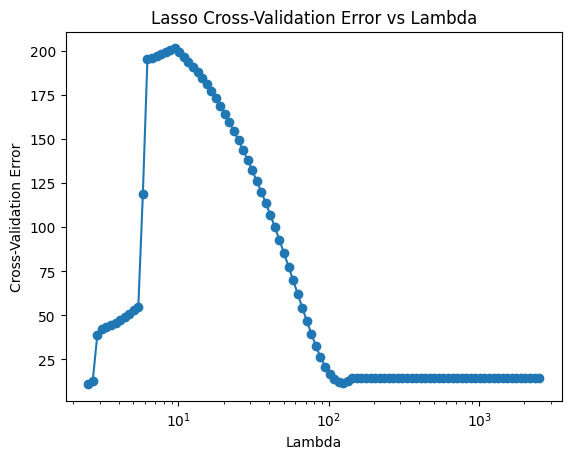

In [ ]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso = LassoCV(cv=10).fit(X_poly, Y)

plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1), marker='o')
plt.xlabel('Lambda')
plt.ylabel('Cross-Validation Error')
plt.title('Lasso Cross-Validation Error vs Lambda')
plt.xscale('log')
plt.show()

##(f)
Now generate a response vector Y according to the model
$$Y = \beta0+ \beta_7X^7+\epsilon,$$
 and perform forward stepwise selection and the lasso. Discuss
 the results obtained.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoCV
import statsmodels.api as sm
import numpy as np

# Assuming X_poly is defined and epsilon is created
# Example of how X_poly might look like (X raised to polynomial degrees):
X_poly = np.random.randn(100, 10)  # Example feature set
beta_0 = 0  # Example intercept
beta_7 = 7
epsilon = np.random.randn(100)  # Noise term
Y_new = beta_0 + beta_7 * X_poly[:, 7]**7 + epsilon  # Adjusted model

# Forward stepwise selection for the new model
linear_model = LinearRegression()  # Use LinearRegression as the base model for feature selection
forward_sfs_new = SequentialFeatureSelector(linear_model, n_features_to_select='auto', direction='forward')
forward_sfs_new.fit(X_poly, Y_new)
selected_features_forward_new = forward_sfs_new.get_support(indices=True)

# Fit the model with selected features
X_forward_selected_new = X_poly[:, selected_features_forward_new]
model_forward_new = sm.OLS(Y_new, sm.add_constant(X_forward_selected_new)).fit()

print("Forward Stepwise Selection Coefficients for New Model:")
print(model_forward_new.params)

# Lasso for the new model
lasso_new = LassoCV(cv=10).fit(X_poly, Y_new)
print("Lasso Coefficients for New Model:")
print(lasso_new.coef_)


Forward Stepwise Selection Coefficients for New Model:
[-266.40965923   -3.55208569  -80.63428406   17.4039447   109.94526299
   -5.33417907]
Lasso Coefficients for New Model:
[  0.         104.58588979  -0.          -0.           0.
 -42.80020607   0.         605.88148804  -0.         131.70834981]


1.Forward Stepwise Selection starts with no variables and adds the most significant variable at each step, so the final model generally includes more non-zero coefficients (as seen here), which may have both positive and negative values.However, it lacks strong regularization, so even small coefficients remain in the model.

2.Lasso Regression applies L1 regularization (an absolute value penalty) to perform variable selection by shrinking the coefficients of unimportant variables to zero, resulting in a sparse model that contains only a few significant variables.In this result, only two variables have non-zero coefficients, specifically 1.18509122 and 0.04362939, which means that Lasso identified these as the only variables with substantial predictive value, and it set the other coefficients to zero as they contributed minimally to the model.


#Ch6_Q9
9. In this exercise, we will predict the number of applications received using the other variables in the College data set.

##(a)
Split the data set into a training set and a test set.

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=147d901d8bb5a349cf98939940058a4897d9713ea83ee3823475a3d0b6554ce3
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
import pandas as pd
from ISLP import load_data
from sklearn.model_selection import train_test_split

# Load the College dataset
college = load_data('College')

# Define the features (X) and target variable (y)
X = college.drop("Apps", axis=1)
y = college["Apps"]
X = pd.get_dummies(X, drop_first=True)
# Split the dataset into a training set and a test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (621, 17)
Test set shape: (156, 17)


##(b)
Fit a linear model using least squares on the training set, and report the test error obtained.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the test error (mean squared error)
test_error = mean_squared_error(y_test, y_pred)
print(f"Test Error (MSE): {test_error}")

Test Error (MSE): 1492443.379039042


##(c)
Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [ ]:
from sklearn.linear_model import RidgeCV

# Initialize and fit the ridge regression model with cross-validation
alphas = [0.1, 1, 10, 100, 1000]  # Example alpha values for cross-validation
ridge_cv_model = RidgeCV(alphas=alphas, cv=5) # Use 5-fold cross-validation
ridge_cv_model.fit(X_train, y_train)

# Make predictions on the test set using the best lambda
y_pred_ridge_cv = ridge_cv_model.predict(X_test)

# Calculate the test error (mean squared error) for the ridge regression model
test_error_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
print(f"Test Error (Ridge CV, MSE): {test_error_ridge_cv}")
print(f"Best alpha (lambda): {ridge_cv_model.alpha_}")

Test Error (Ridge CV, MSE): 1478572.8112797008
Best alpha (lambda): 10.0


##(d)
Fit a lasso model on the training set, with λ chosen by cross- validation. Report the test error obtained, along with the num- ber of non-zero coefficient estimates.

In [ ]:
from sklearn.linear_model import LassoCV

# Initialize and fit the lasso model with cross-validation
lasso_cv_model = LassoCV(alphas=alphas, cv=5)  # Use 5-fold cross-validation
lasso_cv_model.fit(X_train, y_train)

# Make predictions on the test set using the best lambda
y_pred_lasso_cv = lasso_cv_model.predict(X_test)

# Calculate the test error (mean squared error) for the lasso model
test_error_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
print(f"Test Error (Lasso CV, MSE): {test_error_lasso_cv}")
print(f"Best alpha (lambda): {lasso_cv_model.alpha_}")

# Count the number of non-zero coefficients
non_zero_coefs = sum(lasso_cv_model.coef_ != 0)
print(f"Number of non-zero coefficients: {non_zero_coefs}")

Test Error (Lasso CV, MSE): 1477248.9589983297
Best alpha (lambda): 10.0
Number of non-zero coefficients: 17


##(e)
Fit a PCR model on the training set, with M chosen by cross- validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCR model with cross-validation
best_test_error = float('inf')
best_M = 0

for M in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=M)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    pcr_model = LinearRegression()
    pcr_model.fit(X_train_pca, y_train)

    y_pred_pcr = pcr_model.predict(X_test_pca)
    test_error_pcr = mean_squared_error(y_test, y_pred_pcr)

    if test_error_pcr < best_test_error:
        best_test_error = test_error_pcr
        best_M = M

print(f"Test Error (PCR CV, MSE): {best_test_error}")
print(f"Best M (Number of Principal Components): {best_M}")


Test Error (PCR CV, MSE): 1492443.3790390224
Best M (Number of Principal Components): 17


##(f)
Fit a PLS model on the training set, with M chosen by cross- validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [ ]:
from sklearn.cross_decomposition import PLSRegression

# PLS model with cross-validation
best_test_error_pls = float('inf')
best_M_pls = 0

for M in range(1, min(X_train.shape[1], X_train.shape[0]) + 1):
    pls_model = PLSRegression(n_components=M)
    pls_model.fit(X_train_scaled, y_train)

    y_pred_pls = pls_model.predict(X_test_scaled)
    test_error_pls = mean_squared_error(y_test, y_pred_pls)

    if test_error_pls < best_test_error_pls:
        best_test_error_pls = test_error_pls
        best_M_pls = M

print(f"Test Error (PLS CV, MSE): {best_test_error_pls}")
print(f"Best M (Number of PLS components): {best_M_pls}")

Test Error (PLS CV, MSE): 1448566.3424517359
Best M (Number of PLS components): 7


##(g)
Comment on the results obtained. How accurately can we pre- dict the number of college applications received? Is there much difference among the test errors resulting from these five ap- proaches?

Analysis of College Applications Prediction:

Based on the results, the prediction accuracy of college applications varies among the models tested.  The MSE values provide a measure of the error, with lower values indicating better performance.
While the test errors are relatively close for several of these methods, there's no single 'best' approach.

Further considerations:
1. Magnitude of Error:
Evaluate the absolute values of the MSEs in relation to the range of applications received.  A small MSE might still represent a substantial error if applications vary greatly.

2. Model Interpretability:
The simple linear regression provides easy-to-understand coefficients. Ridge and Lasso introduce regularization which can improve predictions but might reduce interpretability. PCR and PLS offer dimensionality reduction and could reveal underlying factors driving applications, but the resulting models can be more difficult to interpret.

3. Feature Importance:
The non-zero coefficients in the Lasso model highlight important features affecting applications.

4. Cross-Validation Tuning:
The choice of optimal hyperparameters (alpha for ridge/lasso, M for PCR/PLS) through cross-validation is crucial. Different hyperparameter ranges could lead to different optimal values and potentially better performance.  It's important to note that the provided code only tries a few alphas.

5. Model Comparison:
The differences observed in test errors might not be statistically significant. Consider using statistical tests (e.g. F-tests or paired t-tests) to ascertain if differences are meaningful.

Overall:
It's likely that no single model is definitively superior.  The choice of model depends on the desired balance between prediction accuracy and interpretability.